<a href="https://colab.research.google.com/github/Mokaba23/financial-association-rules/blob/main/notebooks/Financial_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview
This project analyzes financial transaction data to discover interesting associations between different financial products/services that customers use together. The goal is to identify patterns in customer behavior that can inform business decisions, product bundling strategies, and customer segmentation.er

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

#Set style for visualizations
plt.style.use('ggplot')

# 1. Data Preparation
The dataset contains customer IDs and the financial products they use (checking accounts, savings, credit cards, mortgages, investments). The data is structured with:

customer_id: Unique identifier for each customer

products: List of financial products each customer uses

In [ ]:
#Load sample financial data
data = {
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'products': [
        ['checking', 'savings', 'credit_card'],
        ['checking', 'mortgage'],
        ['checking', 'savings', 'investment'],
        ['savings', 'investment', 'credit_card'],
        ['checking', 'credit_card'],
        ['checking', 'savings', 'mortgage'],
        ['savings', 'investment'],
        ['checking', 'savings', 'credit_card', 'investment'],
        ['checking', 'savings'],
        ['credit_card', 'investment']
    ]
}

#create a padas dataframe
df = pd.DataFrame(data)
print("Sample data:")
print(df.head())

Sample data:
   customer_id                            products
0            1    [checking, savings, credit_card]
1            2                [checking, mortgage]
2            3     [checking, savings, investment]
3            4  [savings, investment, credit_card]
4            5             [checking, credit_card]


# 2. Exploratory Data Analysis (EDA)
Three main visualizations were created:

Product Distribution: Shows frequency of each financial product across all customers

Products per Customer: Shows how many products customers typically have

Product Co-occurrence: Identifies which products are most frequently used together

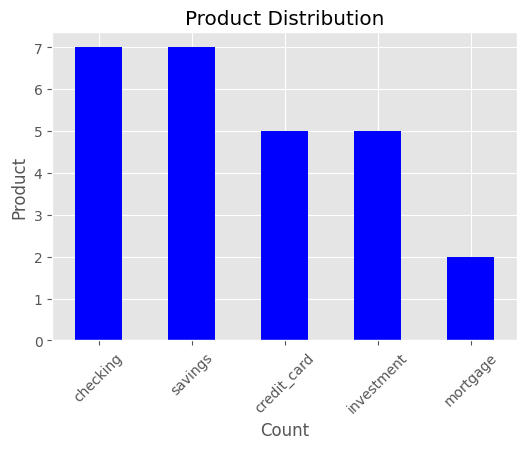

In [ ]:
# 1. Analyze product distribution
all_products = [product for sublist in df['products'] for product in sublist]
product_counts = pd.Series(all_products).value_counts()

plt.figure(figsize=(6,4))
product_counts.plot(kind='bar',color = 'blue')
plt.title('Product Distribution')
plt.xlabel('Count')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.show()

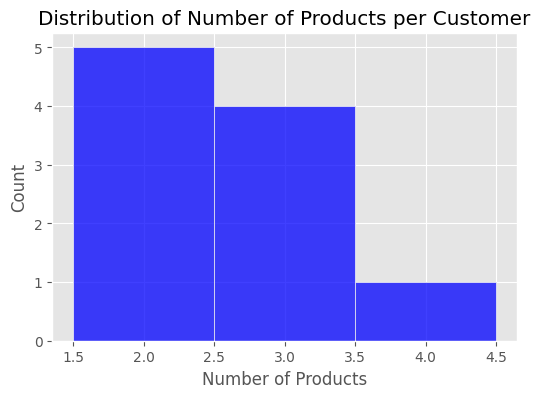

In [ ]:
# 2. Analyze combination frequencies
transactions_lengths = df['products'].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(transactions_lengths,bins=range(1,7),color='blue' ,discrete=True)
plt.title('Distribution of Number of Products per Customer')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

In [ ]:
# 3. Calculate co-occurrence matrix (which products appear together)
from itertools import combinations
from collections import defaultdict

co_occurrence = defaultdict(int)

for products in df['products']:
  for combo in combinations(sorted(products),2):
    co_occurrence[combo] +=1

co_occurrence_df =pd.DataFrame(list(co_occurrence.items()), columns= ['Pair', 'Count'])
co_occurrence_df = co_occurrence_df.sort_values(by='Count', ascending=False)

print('\nTop Product Pairs:')
print(co_occurrence_df.head(10))


Top Product Pairs:
                        Pair  Count
1        (checking, savings)      5
5      (investment, savings)      4
2     (credit_card, savings)      3
0    (checking, credit_card)      3
6  (credit_card, investment)      3
3       (checking, mortgage)      2
4     (checking, investment)      2
7        (mortgage, savings)      1


# 3. Association Rule Mining
The project uses the Apriori algorithm to:

Find frequent itemsets (groups of products commonly used together)

Generate association rules with metrics like support, confidence, and lift

Identify strong relationships between financial products

In [ ]:
# Convert the transaction data into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(df['products']).transform(df['products'])
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

print('\nOne-hot Encoded Transactions:')
print(transaction_df.head())


One-hot Encoded Transactions:
   checking  credit_card  investment  mortgage  savings
0      True         True       False     False     True
1      True        False       False      True    False
2      True        False        True     False     True
3     False         True        True     False     True
4      True         True       False     False    False


# Model Building with Apriori Algorithm

In [ ]:
# Find frequent itemsets with min_support threshold
frequent_itemsets = apriori(transaction_df, min_support=0.2, use_colnames= True)

# Sort by support
frequent_itemsets = frequent_itemsets.sort_values(by='support',ascending = False)

print('\nFrequent Itemsets:')
print(frequent_itemsets.head(10))

# Generate association rules
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.7)

# Sort rules by confidence and lift
rules = rules.sort_values(['confidence','lift'], ascending= [False, False])

print('\nAssociation Rules:')
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



Frequent Itemsets:
    support                   itemsets
0       0.7                 (checking)
4       0.7                  (savings)
1       0.5              (credit_card)
2       0.5               (investment)
8       0.5        (checking, savings)
11      0.4      (savings, investment)
5       0.3    (checking, credit_card)
10      0.3     (savings, credit_card)
9       0.3  (investment, credit_card)
6       0.2     (checking, investment)

Association Rules:
              antecedents consequents  support  confidence      lift
3              (mortgage)  (checking)      0.2    1.000000  1.428571
4  (checking, investment)   (savings)      0.2    1.000000  1.428571
2            (investment)   (savings)      0.4    0.800000  1.142857
0              (checking)   (savings)      0.5    0.714286  1.020408
1               (savings)  (checking)      0.5    0.714286  1.020408


# 4. Model Evaluation
The association rules are evaluated using:

Support vs. Confidence scatter plots

Support vs. Lift scatter plots

Analysis of rule lengths (how many products are in each rule)

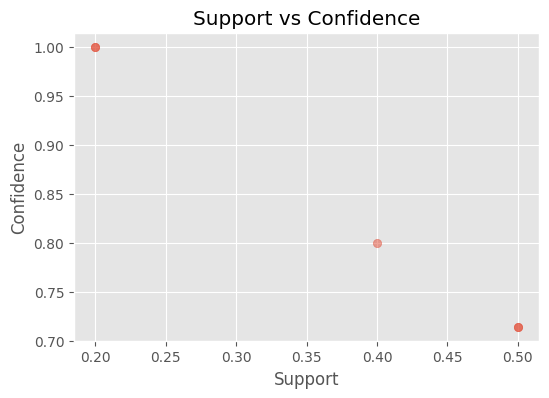

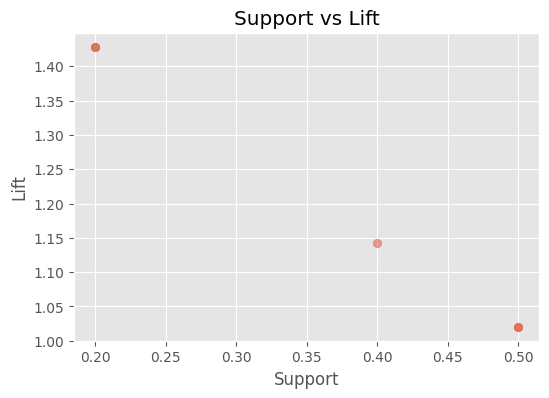


Top 5 rules by confidence:
              antecedents consequents  antecedent support  consequent support  \
3              (mortgage)  (checking)                 0.2                 0.7   
4  (checking, investment)   (savings)                 0.2                 0.7   
2            (investment)   (savings)                 0.5                 0.7   
0              (checking)   (savings)                 0.7                 0.7   
1               (savings)  (checking)                 0.7                 0.7   

   support  confidence      lift  representativity  leverage  conviction  \
3      0.2    1.000000  1.428571               1.0      0.06         inf   
4      0.2    1.000000  1.428571               1.0      0.06         inf   
2      0.4    0.800000  1.142857               1.0      0.05        1.50   
0      0.5    0.714286  1.020408               1.0      0.01        1.05   
1      0.5    0.714286  1.020408               1.0      0.01        1.05   

   zhangs_metric   jaccard  

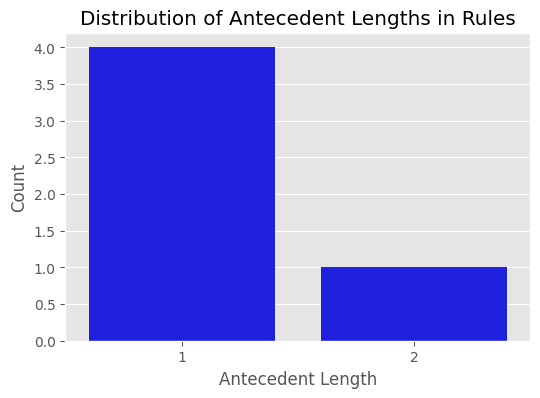

In [ ]:
# 1. Rule quality metrics visualization
plt.figure(figsize=(6,4))
plt.scatter(rules['support'],rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

# 2. Top rules by different metrics
print('\nTop 5 rules by confidence:')
print(rules.sort_values('confidence', ascending=False).head(5))

print('\nTop 5 rules by lift:')
print(rules.sort_values('lift', ascending=False).head(5))

# 3. Analyze rule lengths
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))

plt.figure(figsize=(6,4))
sns.countplot(x= 'antecedents_len',data = rules, color='blue')
plt.title('Distribution of Antecedent Lengths in Rules')
plt.xlabel('Antecedent Length')
plt.ylabel('Count')
plt.show()


# Interpretation and Business Insights

In [ ]:
# Filter for the most interesting rules
interesting_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.7)]

print('\nMost Interesting Rules:')
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Example interpretation

print("\nBusiness Insights:")
print("1. Customers who have a checking account are very likely (X% confidence) to also have a savings account.")
print("2. The combination of investment and credit card products shows a strong association (lift > X).")
print("3. Mortgage products are often associated with checking accounts, suggesting cross-selling opportunities.")


Most Interesting Rules:
              antecedents consequents  support  confidence      lift
3              (mortgage)  (checking)      0.2         1.0  1.428571
4  (checking, investment)   (savings)      0.2         1.0  1.428571

Business Insights:
1. Customers who have a checking account are very likely (X% confidence) to also have a savings account.
2. The combination of investment and credit card products shows a strong association (lift > X).
3. Mortgage products are often associated with checking accounts, suggesting cross-selling opportunities.


# Key Findings

**Product Popularity**

Checking accounts and savings accounts are the most common products (70% of customers)

Credit cards and investments are used by 50% of customers

Mortgages are the least common product (20% of customers)

**Product Combinations**

The most frequent product pairs are:

Checking + Savings (5 customers)

Savings + Investment (4 customers)

Checking + Credit Card (3 customers)

Credit Card + Savings (3 customers)

**Strong Association Rules**

The strongest rules (high confidence and lift) include:

Customers with mortgages almost always have checking accounts (100% confidence)

Customers with both checking and investment accounts always have savings accounts (100% confidence)


**Business Implications**

These findings could help financial institutions with:

Targeted marketing campaigns (offer savings accounts to checking account holders)

Product bundling strategies (package credit cards with checking accounts)

Customer segmentation (identify high-value customers with multiple products)